In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

All the python packages required for initial processing has been loaded.

- The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this data-set consists of such information of 2015 flight delays and cancellations.

# Regression approach

In [4]:
data=pd.read_csv('flights.csv')

C:\Users\Sebastian john\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The csv file containing the data has been uploaded to a pandas dataframe for ease of data processing and manipulation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [6]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

- After Loading the data set to a Pandas Dataframe, a simple .info() function was used to understand the data types, number of columns, number of rows and memory storage of the data.Followed by which the sum of all null values were identified using the isnull() function.
- From null-value analysis we were able to identify weak features. We can remove the 'CANCELLATION_REASON' column since It had 98% of the rows filled with null values.

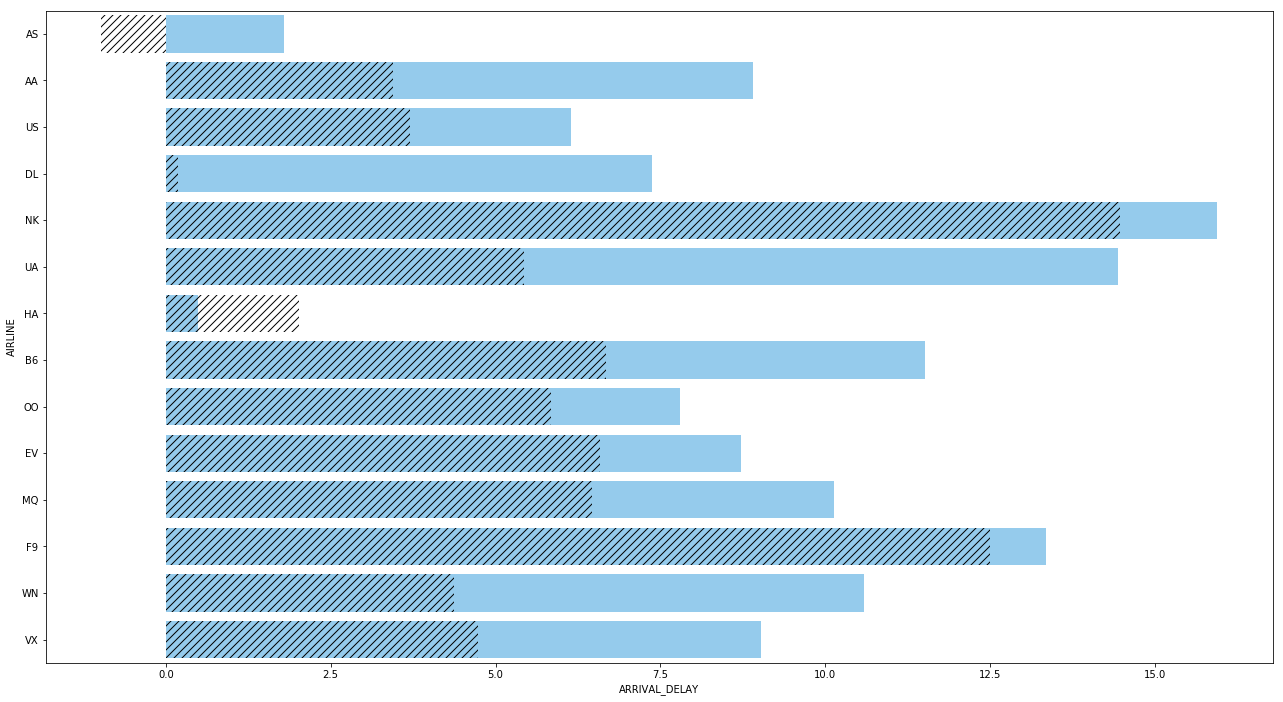

In [9]:
fig = plt.figure(1, figsize=(22,12))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=data, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=data, color="r", hatch = '///',
                 alpha = 0.0, ci=None)

- On this figure, we can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival. In what follows, I will just consider the delays at departure and delays at arrival different.

In [10]:
total_delay=(data[['ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].sum(axis=1,skipna = True))

In [11]:
data['total_delay']=total_delay

In [12]:
df=data.drop(['ARRIVAL_DELAY','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

In [13]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,total_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,0,0,-22.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,0,0,-9.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,0,0,5.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,0,0,-9.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,0,0,-21.0


- A Total Delay column was created by aggregating different types of delays in the data set, and please be sure to drop the columns that were used to create the aggregate column.

In [14]:
dfn=df.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK'],axis=1)

In [15]:
dfn.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,total_delay
0,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,0,0,-22.0
1,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,0,0,-9.0
2,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,0,0,5.0
3,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,0,0,-9.0
4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,0,0,-21.0


- We can also drop the date related features. If you want you can add a date column.

In [16]:
df1=dfn.drop(['AIR_TIME','TAXI_IN','TAXI_OUT'],axis=1)

- I also dropped columns AIR_TIME, TAXI_IN, TAXI_OUT as ELAPSED_TIME is the sum of all of the three above mentioned features.

In [17]:
sc_dep=(df1.SCHEDULED_DEPARTURE)/100
dep_time=(df1.DEPARTURE_TIME)/100

In [18]:
df1['sc_dep']=sc_dep
df1['dep_time']=dep_time

In [19]:
df2=df1.drop(['SCHEDULED_DEPARTURE','DEPARTURE_TIME'],axis=1)

In [20]:
df3 = df2.dropna(axis = 0, how ='any') 

In [21]:
df3.isnull().sum()

AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
DISTANCE               0
WHEELS_ON              0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
DIVERTED               0
CANCELLED              0
total_delay            0
sc_dep                 0
dep_time               0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
df3['airline']=le.fit_transform(df3.AIRLINE)
df3['tailnum']=le.fit_transform(df3.TAIL_NUMBER)
df3['origin']=le.fit_transform(df3['ORIGIN_AIRPORT'].astype(str))
df3['destination']=le.fit_transform(df3['DESTINATION_AIRPORT'].astype(str))

C:\Users\Sebastian john\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sebastian john\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sebastian john\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [25]:
df4=df3.drop(['AIRLINE','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DIVERTED','CANCELLED'],axis=1)

In [26]:
df4.head()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
0,98,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,-22.0,0.05,23.54,1,1622,323,584
1,2336,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,-9.0,0.10,0.02,0,1556,482,542
2,840,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,5.0,0.20,0.18,11,421,584,373
3,258,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,-9.0,0.20,0.15,0,1516,482,510
4,135,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,-21.0,0.25,0.24,1,2131,583,324


In [27]:
# OUTLIER TREATMENT

In [28]:
delayplot=df4.total_delay

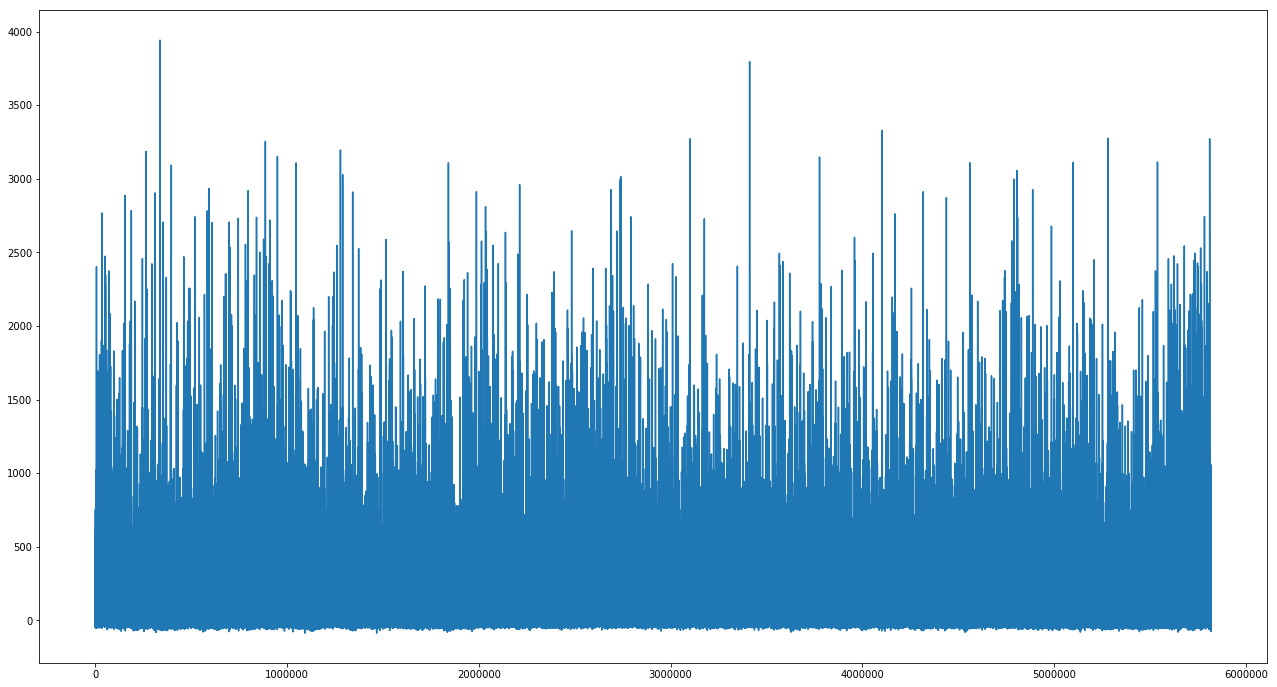

In [29]:
delayplot.plot(figsize=(22,12))

In [30]:
from scipy import stats
delay2 = df4["total_delay"].quantile(0.99)

In [31]:
data_new=df4[df4["total_delay"] < delay2]

In [32]:
data_new.head()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
0,98,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,-22.0,0.05,23.54,1,1622,323,584
1,2336,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,-9.0,0.10,0.02,0,1556,482,542
2,840,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,5.0,0.20,0.18,11,421,584,373
3,258,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,-9.0,0.20,0.15,0,1516,482,510
4,135,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,-21.0,0.25,0.24,1,2131,583,324


In [33]:
data_new.corr()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
FLIGHT_NUMBER,1.000000,-0.016602,0.004728,-0.315623,-0.306367,-0.329418,-0.007804,-0.014161,-0.004530,0.018286,-0.006117,-0.002129,0.079440,0.014454,-0.000930,-0.001372
DEPARTURE_DELAY,-0.016602,1.000000,0.204109,0.031677,0.029879,0.029152,0.101810,0.134442,0.091732,0.912929,0.158081,0.211382,0.055105,-0.006816,0.022886,0.036156
WHEELS_OFF,0.004728,0.204109,1.000000,-0.028884,-0.028517,-0.027808,0.706002,0.727923,0.678878,0.181737,0.949030,0.973650,0.009694,0.009130,-0.020287,0.024837
SCHEDULED_TIME,-0.315623,0.031677,-0.028884,1.000000,0.985827,0.984452,0.025595,0.031751,0.022723,-0.027774,-0.016118,-0.021337,-0.106727,-0.076364,0.045727,0.069319
ELAPSED_TIME,-0.306367,0.029879,-0.028517,0.985827,1.000000,0.974351,0.027161,0.030605,0.024303,0.034517,-0.018262,-0.023268,-0.112077,-0.079547,0.050935,0.073340
DISTANCE,-0.329418,0.029152,-0.027808,0.984452,0.974351,1.000000,0.021228,0.027195,0.017407,-0.023633,-0.009000,-0.016512,-0.083521,-0.076185,0.063765,0.063896
WHEELS_ON,-0.007804,0.101810,0.706002,0.025595,0.027161,0.021228,1.000000,0.889534,0.968930,0.088097,0.672766,0.687685,-0.008822,0.000511,-0.005122,0.013428
SCHEDULED_ARRIVAL,-0.014161,0.134442,0.727923,0.031751,0.030605,0.027195,0.889534,1.000000,0.882198,0.113976,0.704724,0.714865,-0.009644,-0.001284,-0.005403,0.015585
ARRIVAL_TIME,-0.004530,0.091732,0.678878,0.022723,0.024303,0.017407,0.968930,0.882198,1.000000,0.079274,0.646287,0.660674,-0.010089,0.000819,-0.004790,0.011756
total_delay,0.018286,0.912929,0.181737,-0.027774,0.034517,-0.023633,0.088097,0.113976,0.079274,1.000000,0.133160,0.182604,0.030044,-0.010613,0.030677,0.037780


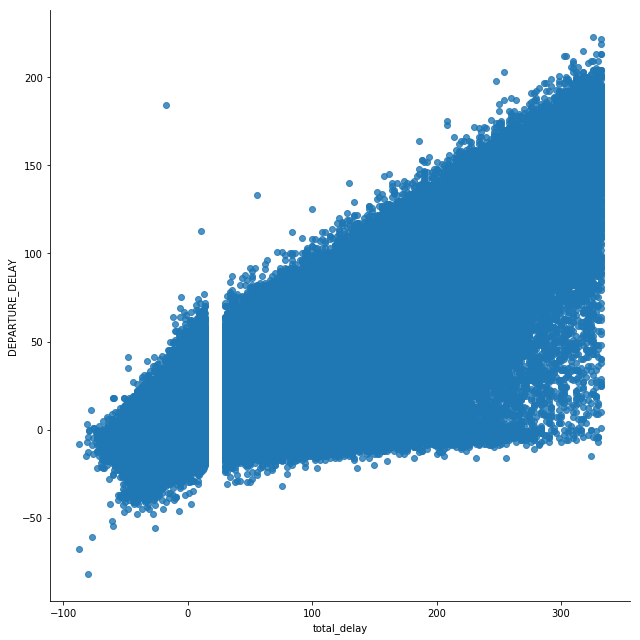

In [34]:
sns.lmplot(y='DEPARTURE_DELAY',x='total_delay',data=data_new,fit_reg=False,height=9)

In [35]:
x=data_new.drop(['SCHEDULED_TIME','SCHEDULED_ARRIVAL','total_delay'],axis=1)
y=data_new.total_delay

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [41]:
#Linear_Regression

In [42]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
pred_le= model.predict(xtest)

In [44]:
rmse = sqrt(mean_squared_error(ytest, pred_le))
rmse = round(rmse, 3)
rmse

15.791

In [45]:
r2_score(ytest,pred_le)

0.8999789033801544

- Now we can use Variacne Inflation Factor to determine the feature importance of all the features. If the value of VIF is more than 5 then we can drop those columns and build the model.

In [48]:
import statsmodels.api as sm

In [49]:
x=data_new.drop(['SCHEDULED_TIME','SCHEDULED_ARRIVAL','total_delay'],axis=1)
y=data_new.total_delay
x = sm.add_constant(x) #Will add the intercept value as constant in the column

In [50]:
#vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
multimodel=sm.OLS(y,x).fit()
multi_pred=multimodel.predict(x)
fitted=multimodel.fittedvalues
res=multimodel.resid

In [52]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,j) for j in range(0,x.shape[1])]

In [53]:
x.columns

Index(['const', 'FLIGHT_NUMBER', 'DEPARTURE_DELAY', 'WHEELS_OFF',
       'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'ARRIVAL_TIME', 'sc_dep',
       'dep_time', 'airline', 'tailnum', 'origin', 'destination'],
      dtype='object')

In [54]:
ce=['const', 'FLIGHT_NUMBER', 'DEPARTURE_DELAY', 'WHEELS_OFF',
       'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'ARRIVAL_TIME', 'sc_dep',
       'dep_time', 'airline', 'tailnum', 'origin', 'destination']

In [55]:
vif['Feature Names']=ce

In [56]:
vif

,VIF Values,Feature Names
0,42.657100,const
1,1.132876,FLIGHT_NUMBER
2,1.107837,DEPARTURE_DELAY
3,20.495049,WHEELS_OFF
4,20.843648,ELAPSED_TIME
5,21.081172,DISTANCE
6,17.608859,WHEELS_ON
7,16.381138,ARRIVAL_TIME
8,20.272721,sc_dep
9,38.241313,dep_time


- Now we can drop the features such as Wheels off, elapsed time, distance, wheels on, arrival time, sc_dep, dep_time

In [72]:
x1=data_new.drop(['SCHEDULED_TIME','SCHEDULED_ARRIVAL','total_delay','WHEELS_OFF','ELAPSED_TIME','DISTANCE','WHEELS_ON',
                 'ARRIVAL_TIME','sc_dep','dep_time'],axis=1)
y1=data_new.total_delay

In [73]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [74]:
model1 = LinearRegression()

In [75]:
model1.fit(xtrain1, ytrain1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
pred_le1= model1.predict(xtest1)

In [77]:
rmse1 = sqrt(mean_squared_error(ytest1, pred_le1))
rmse1 = round(rmse1, 3)
rmse1

20.282

In [78]:
r2_score(ytest1,pred_le1)

0.8349976609058128

- The r2 score has only dropped only by 6%

- Considering the VIF values and the high correlation value of departure delay with the total delay column we can even build a model with the departure delay alone

In [114]:
x2=data_new.DEPARTURE_DELAY
y2=data_new.total_delay
x2 = sm.add_constant(x2) #Will add the intercept value as constant in the column

In [115]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [116]:
multimodel2=sm.OLS(y2,x2).fit()
multi_pred=multimodel2.predict(x2)
fitted2=multimodel2.fittedvalues
res2=multimodel2.resid

In [117]:
multimodel2.rsquared

0.8334392106664311

In [118]:
model2 = LinearRegression()

In [121]:
model2.fit(xtrain2, ytrain2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
pred_le2= model2.predict(xtest2)

In [123]:
rmse2 = sqrt(mean_squared_error(ytest2, pred_le2))
rmse2 = round(rmse2, 3)
rmse2

20.393

In [124]:
r2_score(ytest2,pred_le2)

0.8331895340733495

- The difference in r2 score is less than 0.2% .
- This shows that departure delay is the most important feature that contributes the most to the model 
- From this we can infer that the delay is very much dependent on departure delay.

- Other optimization approaches are given at the end of this python notebook

# The Classification Approach

In [125]:
data_new['total_delay'] =pd.to_numeric(data_new['total_delay'],errors='coerce').round()

C:\Users\Sebastian john\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
data_new.head()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
0,98,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,-22.0,0.05,23.54,1,1622,323,584
1,2336,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,-9.0,0.10,0.02,0,1556,482,542
2,840,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,5.0,0.20,0.18,11,421,584,373
3,258,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,-9.0,0.20,0.15,0,1516,482,510
4,135,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,-21.0,0.25,0.24,1,2131,583,324


In [127]:
d1=data_new.copy()

In [128]:
d1.head()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
0,98,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,-22.0,0.05,23.54,1,1622,323,584
1,2336,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,-9.0,0.10,0.02,0,1556,482,542
2,840,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,5.0,0.20,0.18,11,421,584,373
3,258,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,-9.0,0.20,0.15,0,1516,482,510
4,135,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,-21.0,0.25,0.24,1,2131,583,324


In [129]:
def change(col):
    if col > 0:
        return 1
    else:
        return 0

- Now this function will turn all negative values and 0 values to 0 as we wish to consider 0 and negative values as non delay and all the remaining value greater than 0 will be replaced with 1 considering it as delay.

In [130]:
d1.total_delay = d1.total_delay.apply(change)

In [131]:
d1.head()

,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,total_delay,sc_dep,dep_time,airline,tailnum,origin,destination
0,98,-11.0,15.0,205.0,194.0,1448,404.0,430,408.0,0,0.05,23.54,1,1622,323,584
1,2336,-8.0,14.0,280.0,279.0,2330,737.0,750,741.0,0,0.10,0.02,0,1556,482,542
2,840,-2.0,34.0,286.0,293.0,2296,800.0,806,811.0,1,0.20,0.18,11,421,584,373
3,258,-5.0,30.0,285.0,281.0,2342,748.0,805,756.0,0,0.20,0.15,0,1516,482,510
4,135,-1.0,35.0,235.0,215.0,1448,254.0,320,259.0,0,0.25,0.24,1,2131,583,324


- After applying the function on the total delay column we can see that the values have turned into categorical binary responses
- Now we can apply all classification models for predicting the accurence of a delay.

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [143]:
x=data_new.drop(['SCHEDULED_TIME','SCHEDULED_ARRIVAL','total_delay','WHEELS_OFF','ELAPSED_TIME','DISTANCE','WHEELS_ON',
                 'ARRIVAL_TIME','sc_dep','dep_time'],axis=1)
y=data_new.total_delay

In [144]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33, random_state=42)

In [ ]:
# In this problem we use both scaled and unscaled data for testing the best model.

In [ ]:
#Scaling using Standard Scaler package
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.fit_transform(xtest)
#Train and test Data Scaled

In [ ]:
#logistic regression

In [ ]:
#creating the model
lr=LogisticRegression()
lr.fit(xtrain,ytrain)#Fitting in Unscaled Data
ypred_lr=lr.predict(xtest)

cm=confusion_matrix(ytest,ypred_lr)

print(cm)
print(accuracy_score(ytest,ypred_lr))

In [ ]:
#Creating the model
lr=LogisticRegression()
lr.fit(xtrain_sc,ytrain) #fitting in the scaled data

ypred_lr=lr.predict(xtest_sc)

cm=confusion_matrix(ytest,ypred_lr)

print(cm)
print(accuracy_score(ytest,ypred_lr))

In [ ]:
# Decision tree

In [ ]:
#Creating the model with unscaled data
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)#Unscaled data

ypred_dt=dt.predict(xtest)

cm=confusion_matrix(ytest,ypred)

print(cm)
print(accuracy_score(ytest,ypred))

In [ ]:
#Creating the model with scaled data
dt=DecisionTreeClassifier()
dt.fit(xtrain_sc,ytrain)#scaled data

ypred_dt=dt.predict(xtest_sc)

cm=confusion_matrix(ytest,ypred)

print(cm)
print(accuracy_score(ytest,ypred))

In [ ]:
# Naive bayes algorithm

In [ ]:
#Creating the model with unscaled data
nb=GaussianNB()
nb.fit(xtrain,ytrain)#unscaled data

ypred_nb=nb.predict(xtest)

cm=confusion_matrix(ytest,ypred_nb)

print(nb)
print(accuracy_score(ytest,ypred_nb))

In [ ]:
#Creating the model with scaled data
nb=GaussianNB()
nb.fit(xtrain_sc,ytrain)#Scaled data

ypred_nb=nb.predict(xtest_sc)

cm=confusion_matrix(ytest,ypred_nb)

print(nb)
print(accuracy_score(ytest,ypred_nb))

In [ ]:
#Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(max_depth=2,random_state=0)
rf.fit(xtrain,ytrain)

ypred_rf=rf.predict(xtest)

cm=confusion_matrix(ytest,ypred_rf)

print(cm)
print(accuracy_score(ytest,ypred_rf))

In [ ]:
rf=RandomForestClassifier(max_depth=2,random_state=0)
rf.fit(xtrain_sc,ytrain)

ypred_rf=rf.predict(xtest_sc)

cm=confusion_matrix(ytest,ypred_rf)

print(cm)
print(accuracy_score(ytest,ypred_rf))

- The model with the highest accuracy score is the best model for this flight delay prediction

# Optimization

- In regression we can measure check the assumptions of Linear regresison such as :
    - Linearity
    - Normality
    - Auto co-relation
  and optimize the model further
- In regresison we can also try a few more models such as Gradient Descent regressor, lasso regression and multinomial regression for better results


- In classification we can also use feature reduction techniques such as LDA and fit in all the models for better accuracy
- In classification we can use advanced models such as support vector machines. 

# Future steps

- This sample file is no where near the complexity of a real-time production quality flight delay model, but from this model we can have an overview how basic stuff work in the prediction process of a flight delay. 
- I have discussed a new points required for a production grade model.

- For a production grade model we need to predict the departure delay because the passengers will not have the departure delay information untill the 2 to 8 hours before the travel. For an efficient system we need to predict even the departure delay based on the below mentioned variables. 
     - Data about the flight condition (Engine, age and tech used). Newer flights have less maintenance and higher performance.
     - Data about air-line staff (pilots and ground staff)
     - weather data for all geographical location both past and future
- after predicting the depature delay very accurately, it can be used to predict the total arrival delay. 

- In production grade model we can also implement neural networks for more accurate predictions